In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
# import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

In [ ]:
# Load data into DataFrames
region_df = pd.read_sql_query("SELECT * FROM region", conn)
wine_df = pd.read_sql_query("SELECT * FROM wine", conn)
price_df = pd.read_sql_query("SELECT * FROM price", conn)

In [4]:
# SQLite connection
import sqlite3
conn = sqlite3.connect('wine.db')

In [5]:
def import_csv_to_sqlite(csv_file, table_name):
    df = pd.read_csv(csv_file)
    df.to_sql(table_name, conn, if_exists='replace', index=False)

In [6]:
# File paths and table names
files_and_tables = {
    "Resources/CityData_sql.csv": "region",
    "Resources/Wine_new.csv": "wine",
    "Resources/Price_new.csv": "price"
}

In [7]:
# Import each CSV file into its corresponding SQLite table
for csv_file, table_name in files_and_tables.items():
    import_csv_to_sqlite(csv_file, table_name)

In [8]:
# # # create engine to wine.sqlite

engine = create_engine("sqlite:///wine.db", echo=True)

In [ ]:
inspector = inspect(engine)
inspector.get_table_names()

In [ ]:
# reflect an existing database into a new model

# Base = automap_base()
# Base.prepare(autoload_with=engine)
# session = Session(engine) 
# Base.classes.keys()

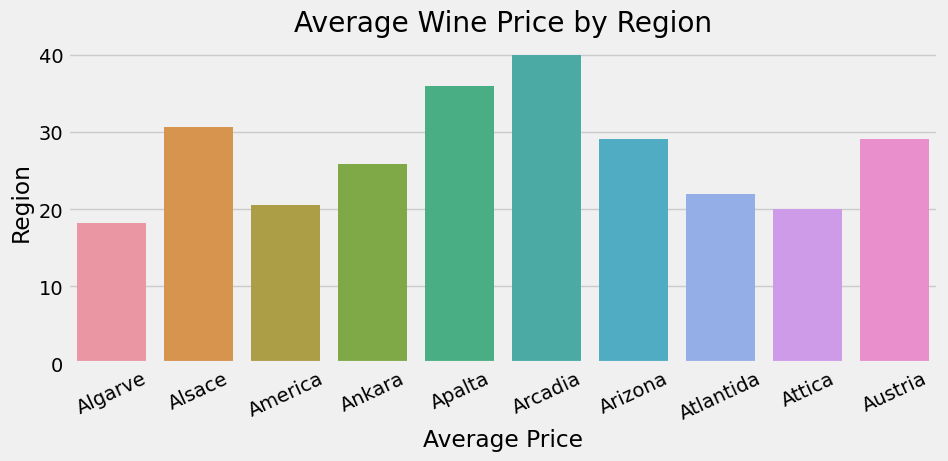

In [9]:

# Plotting average wine price by region
avg_price_by_region = pd.read_sql_query("""
SELECT r.region, AVG(p.price) AS avg_price
FROM price p
JOIN wine w ON p.wine_id = w.wine_id
JOIN region r ON w.region_id = r.region_id
GROUP BY r.region
LIMIT 10;
""", conn)

plt.figure(figsize=(10, 4))
sns.barplot(y='avg_price', x='region', data=avg_price_by_region)
plt.title('Average Wine Price by Region')
plt.xlabel('Average Price')
plt.ylabel('Region')
plt.xticks(rotation = 25)
plt.show()


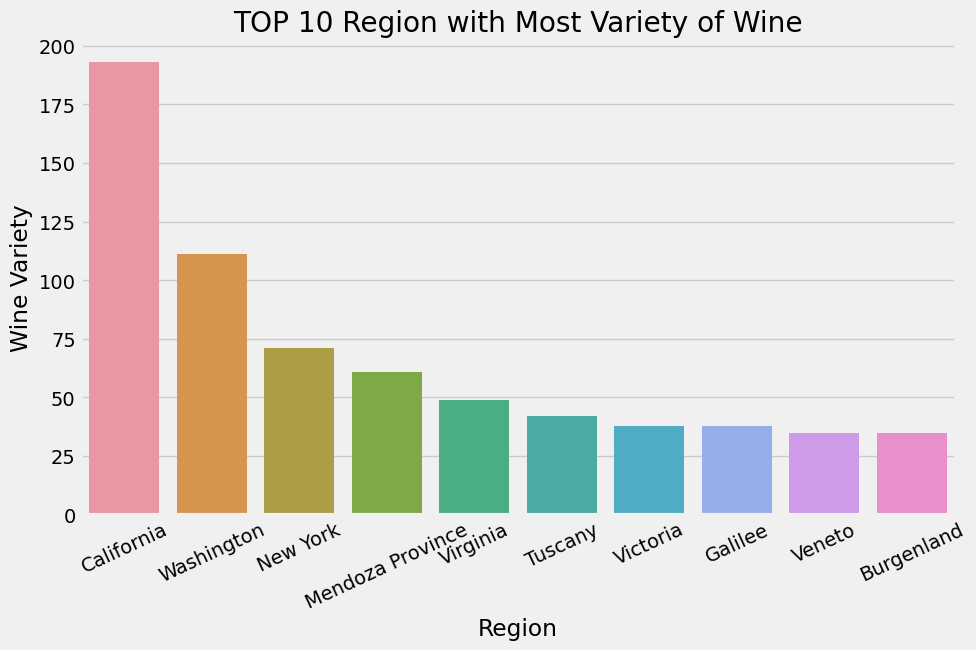

In [46]:
regionWithMostVariety = pd.read_sql_query("""SELECT r.region, COUNT(DISTINCT w.category) AS wine_varieties
FROM wine w
JOIN region r ON w.region_id = r.region_id
GROUP BY r.region
ORDER BY wine_varieties DESC LIMIT 10;""",conn)

plt.figure(figsize=(10, 6))
sns.barplot(y='wine_varieties', x='region', data=regionWithMostVariety)
plt.title('TOP 10 Region with Most Variety of Wine')
plt.ylabel('Wine Variety')
plt.xlabel('Region')
plt.tight_layout()
plt.xticks(rotation = 25)
plt.show()

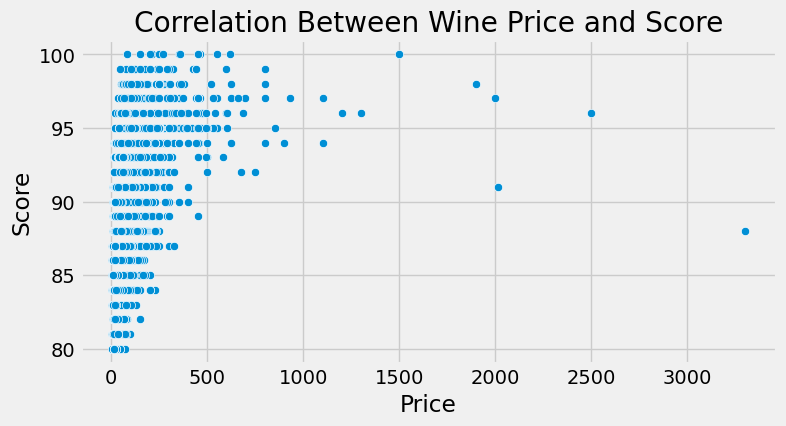

In [11]:
query = """
SELECT p.price, p.score
FROM price p;
"""
price_score_data = pd.read_sql_query(query, conn)

plt.figure(figsize=(8, 4))
sns.scatterplot(x='price', y='score', data=price_score_data)
plt.title('Correlation Between Wine Price and Score')
plt.xlabel('Price')
plt.ylabel('Score')
plt.show()


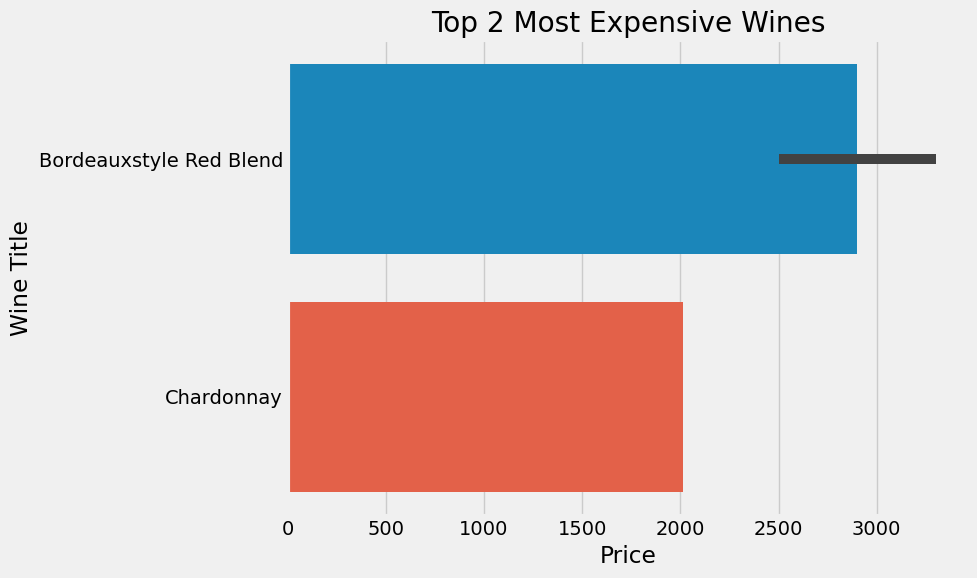

In [25]:
query = """
SELECT w.category, p.price
FROM price p
JOIN wine w ON p.wine_id = w.wine_id
ORDER BY p.price DESC
LIMIT 3;
"""
top_expensive_wines = pd.read_sql_query(query, conn)

plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='category', data=top_expensive_wines)
plt.title('Top 2 Most Expensive Wines')
plt.xlabel('Price')
plt.ylabel('Wine Title')
plt.tight_layout()
plt.show()


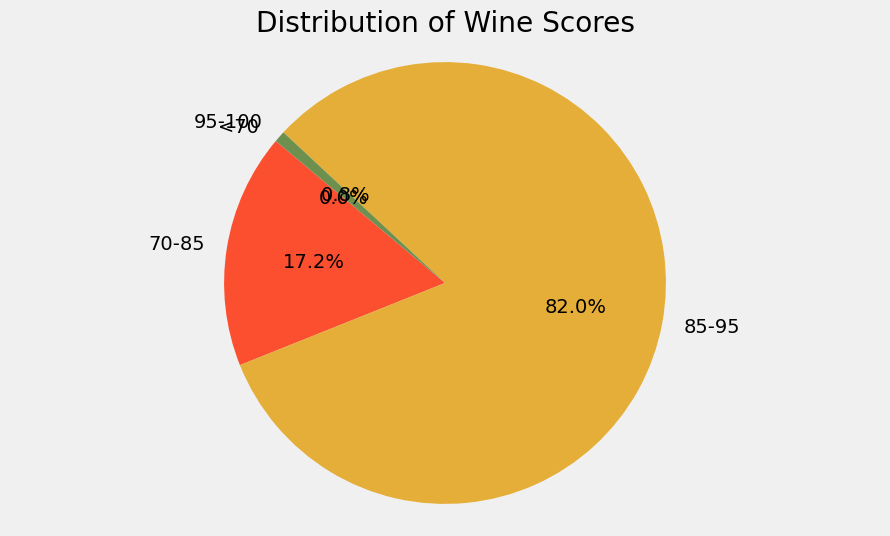

In [30]:
# Categorize scores into ranges
price_df['score_range'] = pd.cut(price_df['score'], bins=[0, 70, 85, 95, 100], labels=['<70', '70-85', '85-95', '95-100'])

score_distribution = price_df['score_range'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.pie(score_distribution, labels=score_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Wine Scores')
plt.axis('equal')
plt.show()


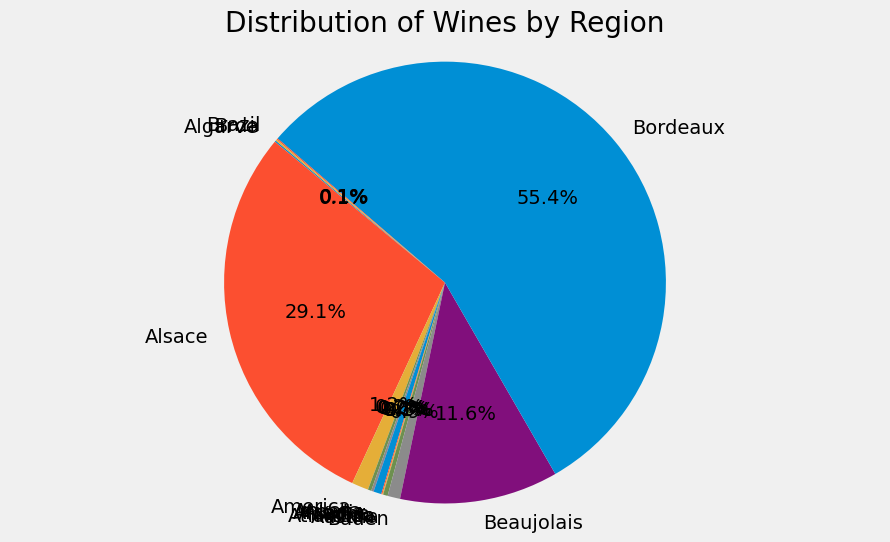

In [23]:
# Load data into DataFrame
query = """
SELECT r.region, COUNT(w.wine_id) AS wine_count
FROM wine w
JOIN region r ON w.region_id = r.region_id
GROUP BY r.region LIMIT 15;
"""
wine_count_by_region = pd.read_sql_query(query, conn)

plt.figure(figsize=(10, 6))
plt.pie(wine_count_by_region['wine_count'], labels=wine_count_by_region['region'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Wines by Region')
plt.axis('equal')
plt.show()


In [31]:
# Close the connection
conn.close()

In [8]:
# # Database connection parameters
# database_type = 'postgresql' 
# username = 'root'
# password = 'aashi1213'
# host = 'localhost'
# port = '5432'
# database_name = 'wine_db'

In [9]:
# # Create a connection string
# connection_string = f'{database_type}://{username}:{password}@{host}:{port}/{database_name}'

In [10]:
# # # # create engine to wine.sqlite
# engine = create_engine(connection_string)
# # engine = create_engine("sqlite:///wine_db", echo=True)